# POSTTEST 5
##### NAMA : FRANSISKUS ANDRE
##### NIM  : 2009106065

# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [4]:
df = pd.read_csv('breast-cancer.csv')

In [5]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# DATA PREPOCESSING

##Transformasi Data

In [11]:
df['diagnosis']=df['diagnosis'].replace(['M', 'B'],[1,0])#mentranformasi data 

## STANDARISASI DATA

#### Membuat variabel  untuk normalisasi data

In [12]:
std_scaler = StandardScaler()

#### Standrarisasi data dan menampilkan hasil standarisasi

In [13]:
standarisasi = std_scaler.fit_transform(df[df.columns.difference(['id','diagnosis'])])
df[df.columns.difference(['id','diagnosis'])] = standarisasi
print("Nilai standar deviasi setelah scaling:", np.nanstd(standarisasi))


Nilai standar deviasi setelah scaling: 1.0


In [14]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,926682,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# DATA MODELING


### Membuat Model

In [16]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]##data
Y = df['diagnosis']##label

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = True, test_size=.2)#Membagi data untuk data traininf dan data testing

### NAIVE BAYES

In [18]:
classifier = GaussianNB()#membuat variabel untuk klasifikasi

In [19]:
classifier.fit(x_train,y_train)#melatih data


GaussianNB()

In [20]:
classifier.score(x_test, y_test)

0.9473684210526315

In [21]:
predicted_value = classifier.predict(x_test)#prediksi data
accuracy = accuracy_score(y_test,predicted_value)#akurasi data

In [22]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



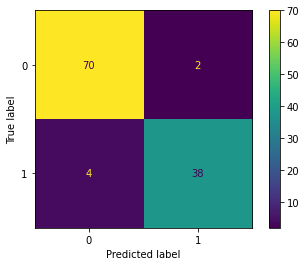

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, predicted_value)

## SVM

In [30]:
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)


SVC(kernel='linear')

In [31]:
predicted_value = svc.predict(x_test)#prediksi data
accuracy = accuracy_score(y_test,predicted_value)#akurasi data

In [32]:
svc.score(x_test, y_test)#score hasil klasifikasi

0.9649122807017544

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



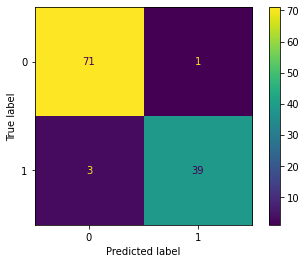

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, predicted_value)

## Mengkonversi hasil prediksi

In [35]:
hasil = pd.concat([x_test.reset_index(drop = True),pd.Series(predicted_value)],axis = 1)

In [36]:
hasil

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,0
0,0.159817,-1.235591,0.257479,0.003444,0.479635,1.502076,0.705598,0.363201,1.001751,1.596561,...,-1.194821,0.203699,-0.125485,-0.051226,0.694887,0.238492,-0.057956,-0.119321,0.450762,0
1,-0.271884,-0.146523,-0.246689,-0.342115,1.383436,0.355511,0.424367,0.631459,1.155090,0.704888,...,0.370108,-0.132881,-0.213029,2.026595,1.032677,1.095810,1.434251,1.616558,1.881599,1
2,-0.334368,-0.760869,-0.363670,-0.401556,0.294605,-0.472100,-0.342114,-0.392562,-0.297985,0.269684,...,-0.935900,-0.549585,-0.518906,0.698367,-0.301944,-0.230706,-0.137134,0.775312,0.659126,0
3,1.187949,-0.165140,1.096935,1.098139,-0.745834,-0.372605,-0.089257,0.237843,-0.695938,-1.211713,...,0.111186,0.951324,0.930669,-0.393146,-0.062119,0.391533,0.647036,0.493818,-0.807177,1
4,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.378508,-1.721948,0.433773,0.233247,2.087974,0.969539,1.436297,1.567780,0.563638,1.118828,...,-1.406518,0.528365,0.389232,0.908780,0.661808,1.491126,1.036837,0.509996,0.945071,1
110,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
111,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432,1
112,0.114375,0.011717,0.093953,0.013683,-0.888165,-0.499201,-0.007901,-0.507346,-1.236277,-0.756662,...,0.441759,0.024984,-0.088042,-1.028767,0.067653,0.507153,-0.284223,-0.695250,-0.516244,0


In [37]:
hasil.to_csv("hasil_prediksi.csv",index = False)

In [38]:
df_hasil = pd.read_csv("hasil_prediksi.csv")

In [39]:
df_hasil.rename(columns={df_hasil.columns[-1]: 'prediksi'}, inplace=True)

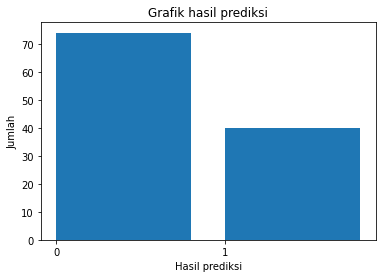

In [40]:
plt.bar(df_hasil['prediksi'].unique(), df_hasil['prediksi'].value_counts(), align = 'edge')
plt.xticks(df_hasil['prediksi'].unique())
plt.xlabel("Hasil prediksi") 
plt.ylabel("Jumlah") 
plt.title("Grafik hasil prediksi") 
plt.show() 

In [41]:
df_hasil.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediksi
0,0.159817,-1.235591,0.257479,0.003444,0.479635,1.502076,0.705598,0.363201,1.001751,1.596561,...,-1.194821,0.203699,-0.125485,-0.051226,0.694887,0.238492,-0.057956,-0.119321,0.450762,0
1,-0.271884,-0.146523,-0.246689,-0.342115,1.383436,0.355511,0.424367,0.631459,1.155090,0.704888,...,0.370108,-0.132881,-0.213029,2.026595,1.032677,1.095810,1.434251,1.616558,1.881599,1
2,-0.334368,-0.760869,-0.363670,-0.401556,0.294605,-0.472100,-0.342114,-0.392562,-0.297985,0.269684,...,-0.935900,-0.549585,-0.518906,0.698367,-0.301944,-0.230706,-0.137134,0.775312,0.659126,0
3,1.187949,-0.165140,1.096935,1.098139,-0.745834,-0.372605,-0.089257,0.237843,-0.695938,-1.211713,...,0.111186,0.951324,0.930669,-0.393146,-0.062119,0.391533,0.647036,0.493818,-0.807177,1
4,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541,1


# Menghitung akurasi ketepatan membagi data 

## Model SVM

In [42]:
split = [0.1]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9473684210526315]


In [43]:
split = [0.2]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9736842105263158]


In [44]:
split = [0.3]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9707602339181286]


In [45]:
split = [0.4]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9649122807017544]


## Model Naive Bayes

In [46]:
split = [0.1]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.8947368421052632]


In [47]:
split = [0.2]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9298245614035088]


In [48]:
split = [0.3]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9181286549707602]


In [49]:
split = [0.4]
list_of_score = []
for i in split:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i)
    model = GaussianNB()
    model.fit(X_train, y_train)
    list_of_score.append(model.score(X_test, y_test))
    print(list_of_score)

[0.9298245614035088]
